### Read the data on the SPX index; the first column is the "total return" which incorporates corporate actions

In [1]:
lines = readlines("../data/sp.txt")

24420-element Array{String,1}:
 " "                                                                                                                                                                                                                                                               
 "                                                                                                                                                                                                                                                                "
 " "                                                                                                                                                                                                                                                               
 "   caldt        vwretd        sprtrn      spindx"                                                                                                                                          

### Work out which row the data seems to start on

In [2]:
length.(lines)

24420-element Array{Int64,1}:
   1
 256
   1
  48
   0
  48
  48
  48
  48
  48
  48
  48
  48
   ⋮
  48
  48
  48
  48
  48
  48
  48
  48
  48
  48
  48
  48

### Check the intermediate rows

In [3]:
unique(length.(lines[6:end]))

1-element Array{Int64,1}:
 48

### Isolate the first column

In [4]:
[line[14:22] for line in lines[7:end]]

24414-element Array{String,1}:
 " 0.004297"
 "-0.001357"
 "-0.004603"
 " 0.000537"
 " 0.003907"
 "-0.002693"
 " 0.002218"
 "-0.006515"
 "-0.001597"
 " 0.003465"
 "-0.005732"
 "-0.012153"
 "-0.000511"
 ⋮          
 " 0.002792"
 "-0.000889"
 "-0.002019"
 "-0.003911"
 " 0.001673"
 "-0.006173"
 " 0.001880"
 "-0.013623"
 " 0.002201"
 "-0.008636"
 " 0.006236"
 " 0.000819"

### Parse the first column

In [5]:
returns = [parse(Float64,line[14:22]) for line in lines[7:end]]

24414-element Array{Float64,1}:
  0.004297
 -0.001357
 -0.004603
  0.000537
  0.003907
 -0.002693
  0.002218
 -0.006515
 -0.001597
  0.003465
 -0.005732
 -0.012153
 -0.000511
  ⋮       
  0.002792
 -0.000889
 -0.002019
 -0.003911
  0.001673
 -0.006173
  0.00188 
 -0.013623
  0.002201
 -0.008636
  0.006236
  0.000819

### Import some basic statistics functions

In [6]:
using StatsBase

### Find tertile boundaries

In [7]:
(lo,hi) = StatsBase.quantile(returns,[1/3,2/3])

2-element Array{Float64,1}:
 -0.002208333333333334
  0.003497666666666664

### We'll use ```searchsorted``` to find which tertile each is in

In [8]:
[searchsorted([lo,hi],r) for r in returns]

24414-element Array{UnitRange{Int64},1}:
 3:2
 2:1
 1:0
 2:1
 3:2
 1:0
 2:1
 1:0
 2:1
 2:1
 1:0
 1:0
 2:1
 ⋮  
 2:1
 2:1
 2:1
 1:0
 2:1
 1:0
 2:1
 1:0
 2:1
 1:0
 3:2
 2:1

### Searchsorted returns a range of indices where the element occurs in the list.  We want the first index.

In [25]:
tertiles = [searchsorted([lo,hi],r).start for r in returns]

24414-element Array{Int64,1}:
 3
 2
 1
 2
 3
 1
 2
 1
 2
 2
 1
 1
 2
 ⋮
 2
 2
 2
 1
 2
 1
 2
 1
 2
 1
 3
 2

### Estimate a Markov chain

In [26]:
n = [sum((tertiles[1:end-1].==i).&(tertiles[2:end].==j)) for i in 1:3, j in 1:3]

3×3 Array{Int64,2}:
 3146  2275  2717
 2570  3123  2444
 2422  2740  2976

## The mean reversion that we previously saw in SPY doesn't occur for the larger dataset!!!

In [27]:
n ./ sum(n,dims=2)

3×3 Array{Float64,2}:
 0.386581  0.279553  0.333866
 0.315841  0.383802  0.300356
 0.297616  0.336692  0.365692

In [28]:
n = [sum((cubiles[end-25*252-1:end-1].==i).&(cubiles[end-25*252:end].==j)) for i in 1:3, j in 1:3]

3×3 Array{Int64,2}:
 730  528  858
 642  750  620
 743  735  695

In [29]:
n ./ sum(n,dims=2)

3×3 Array{Float64,2}:
 0.344991  0.249527  0.405482
 0.319085  0.372763  0.308151
 0.341924  0.338242  0.319834

In [30]:
lag = 4*252
n = [sum((tertiles[i-lag:i-1].==1).&(tertiles[i-lag+1:i].==3))/sum(tertiles[i-lag:i-1].==1) for i in lag+1:length(tertiles)]

23406-element Array{Float64,1}:
 0.35587188612099646
 0.35587188612099646
 0.35815602836879434
 0.3594306049822064 
 0.35815602836879434
 0.3568904593639576 
 0.36042402826855124
 0.36042402826855124
 0.3617021276595745 
 0.3617021276595745 
 0.3617021276595745 
 0.36298932384341637
 0.36428571428571427
 ⋮                  
 0.38405797101449274
 0.38405797101449274
 0.38405797101449274
 0.38405797101449274
 0.38267148014440433
 0.38267148014440433
 0.381294964028777  
 0.381294964028777  
 0.3776978417266187 
 0.3776978417266187 
 0.37992831541218636
 0.37992831541218636

In [31]:
using Plots

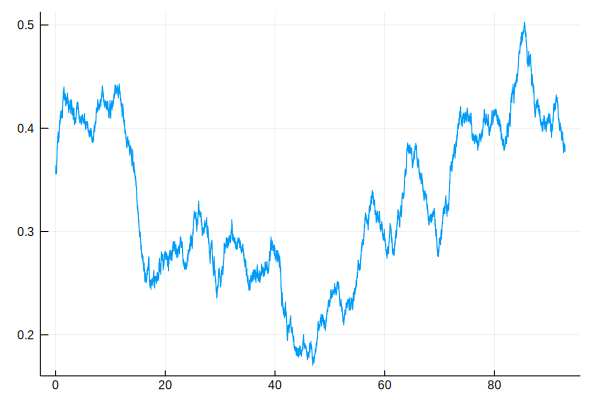

In [32]:
plot((1:length(n))/252, n, legend=false)

### Test out the optimization package NLopt

In [33]:
Pkg.add("NLopt")

 Resolving package versions...
  Updating `~/.julia/Project.toml`
 [no changes]
  Updating `~/.julia/Manifest.toml`
 [no changes]


In [34]:
using NLopt

In [35]:
function f(x::Vector{Float64}, g::Vector{Float64})
    g[1] = 2*(x[1]-1.0)
    g[2] = 2*(x[2]-2.0)
    return (x[1]-1.0)^2+(x[2]-2.0)^2
end

f (generic function with 1 method)

In [36]:
problem = Opt(:LD_MMA, 2)

Opt(LD_MMA, 2)

In [37]:
xtol_rel!(problem,1e-4)

In [38]:
min_objective!(problem,f)

In [39]:
(minf,minx,ret)=optimize(problem,zeros(2))

(9.803473164442314e-14, [1.0, 2.0], :XTOL_REACHED)

In [40]:
minx-[1.0,2.0]

2-element Array{Float64,1}:
 -2.6306580958035397e-7
 -1.6979726580323984e-7

### Now let's find the optimal weight for the 1 state model

In [41]:
recentreturns = returns[end-25*252:end]

6301-element Array{Float64,1}:
  0.007971
  0.002253
  0.009565
 -0.002813
  0.000372
 -0.003702
 -0.006356
 -0.009953
  0.00323 
  0.012654
 -0.000501
  0.00164 
 -0.001721
  ⋮       
  0.002792
 -0.000889
 -0.002019
 -0.003911
  0.001673
 -0.006173
  0.00188 
 -0.013623
  0.002201
 -0.008636
  0.006236
  0.000819

In [26]:
function f(w::Vector{Float64}, g::Vector{Float64})
    g[1] = sum(recentreturns ./ (1 .+ w[1] .* recentreturns))
    return sum(log.(1 .+ w[1] .* recentreturns))
end

f (generic function with 1 method)

In [27]:
problem = Opt(:LD_MMA,1)

Opt(LD_MMA, 1)

In [28]:
lower_bounds!(problem,[0.0])

In [29]:
upper_bounds!(problem,[10.0])

In [30]:
xtol_rel!(problem,1e-4)

In [31]:
max_objective!(problem,f)

In [32]:
(minf,minx,ret)=optimize(problem,[0.5])

(4.531214199891127, [3.29434], :XTOL_REACHED)

In [89]:
wr0 = minx[1]*recentreturns

6302-element Array{Float64,1}:
 -0.018949047212224627 
  0.026259189034882214 
  0.007422149403536522 
  0.03151036797373584  
 -0.009266980147424874 
  0.0012254947084401184
 -0.01219564895334763  
 -0.020938828943132773 
 -0.032788572132001335 
  0.010640720183498877 
  0.041686586130648545 
 -0.0016504646476572563
  0.005402718607101597 
  ⋮                    
  0.009197798994529062 
 -0.002928668805922756 
 -0.0066512736998403195
 -0.012884166141691675 
  0.005511431847366446 
 -0.020335964610754972 
  0.006193360354482319 
 -0.0448788021856982   
  0.007250843691604033 
 -0.028449925543249627 
  0.020543508069442416 
  0.002698064962936712 

In [90]:
StatsBase.mean(log.(1 .+ wr0))*252

0.18042605463807604

In [91]:
StatsBase.std(log.(1 .+ wr0))*sqrt(252)

0.599076492356943

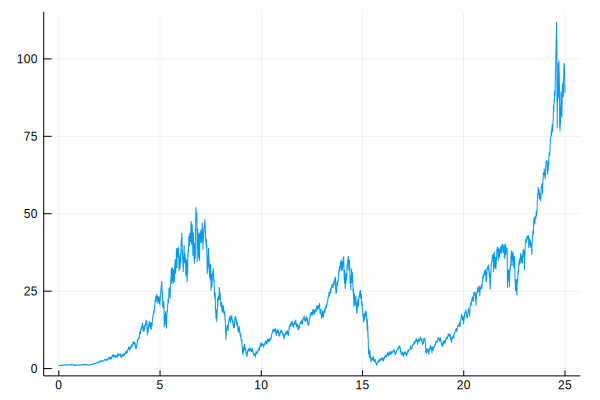

In [92]:
plot((1:length(recentreturns))/252,cumprod(1 .+ wr0), legend=false)

┌ Warning: scale log is unsupported with Plots.GRBackend().  Choose from: Symbol[:identity, :log10]
└ @ Plots /home/jrun/.julia/packages/Plots/EJpx2/src/args.jl:1168


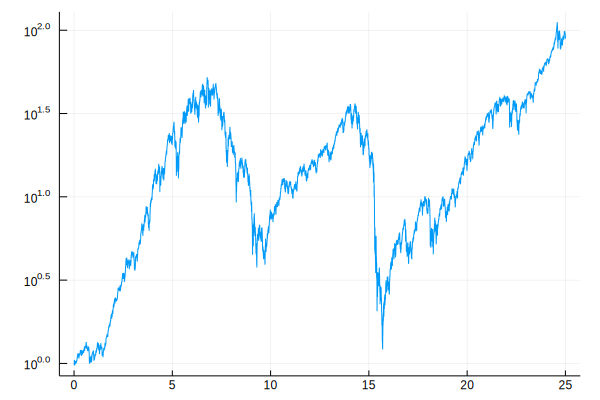

In [93]:
plot((1:length(recentreturns))/252,cumprod(1 .+ wr0), legend=false, yscale=:log)

In [35]:
recentreturns = returns[end-25*252-1:end]
(lo,hi) = StatsBase.quantile(recentreturns,[1/3,2/3])
cubiles = [searchsorted([lo,hi],r).start for r in recentreturns]

6302-element Array{Int64,1}:
 1
 3
 2
 3
 1
 2
 1
 1
 1
 2
 3
 2
 2
 ⋮
 2
 2
 2
 1
 2
 1
 2
 1
 2
 1
 3
 2

In [36]:
cubilereturns = [recentreturns[2:end][cubiles[1:end-1].==i] for i in 1:3]

3-element Array{Array{Float64,1},1}:
 [0.007971, 0.000372, -0.006356, -0.009953, 0.00323, 0.000798, 0.005549, 0.004561, 0.00219, 0.002301  …  0.004428, 0.007425, 0.003406, 0.012907, 0.010939, 0.002792, 0.001673, 0.00188, 0.002201, 0.006236]           
 [0.009565, -0.003702, 0.012654, 0.00164, -0.001721, 0.00423, -0.007815, 0.002875, -0.000279, -0.006016  …  0.003144, 0.001203, 0.001815, -0.003889, -0.000889, -0.002019, -0.003911, -0.006173, -0.013623, -0.008636]
 [0.002253, -0.002813, -0.000501, -0.001877, 0.004746, -0.001914, -0.004926, -0.001367, -0.002358, 0.002051  …  0.00338, 0.009527, 0.002118, -0.000679, -0.003195, -0.006667, 0.00478, 0.000747, -0.000615, 0.000819] 

In [37]:
w3 = fill(NaN,3)

3-element Array{Float64,1}:
 NaN
 NaN
 NaN

In [38]:
function f1(w::Vector{Float64}, g::Vector{Float64})
    g[1] = sum(cubilereturns[1] ./ (1 .+ w[1] .* cubilereturns[1]))
    return sum(log.(1 .+ w[1] .* cubilereturns[1]))
end

f1 (generic function with 1 method)

In [39]:
problem = Opt(:LD_MMA,1)
lower_bounds!(problem,[0.0])
upper_bounds!(problem,[10.0])
xtol_rel!(problem,1e-4)
max_objective!(problem,f1)
(minf,w,ret)=optimize(problem,[0.5])
w3[1]=w[1]

5.096805462450377

In [40]:
function f2(w::Vector{Float64}, g::Vector{Float64})
    g[1] = sum(cubilereturns[2] ./ (1 .+ w[1] .* cubilereturns[2]))
    return sum(log.(1 .+ w[1] .* cubilereturns[2]))
end

f2 (generic function with 1 method)

In [41]:
problem = Opt(:LD_MMA,1)
lower_bounds!(problem,[0.0])
upper_bounds!(problem,[10.0])
xtol_rel!(problem,1e-4)
max_objective!(problem,f2)
(minf,w,ret)=optimize(problem,[0.5])
w3[2]=w[1]

0.5728522755172032

In [42]:
function f3(w::Vector{Float64}, g::Vector{Float64})
    g[1] = sum(cubilereturns[3] ./ (1 .+ w[1] .* cubilereturns[3]))
    return sum(log.(1 .+ w[1] .* cubilereturns[3]))
end

f3 (generic function with 1 method)

In [43]:
problem = Opt(:LD_MMA,1)
lower_bounds!(problem,[0.0])
upper_bounds!(problem,[10.0])
xtol_rel!(problem,1e-4)
max_objective!(problem,f3)
(minf,w,ret)=optimize(problem,[0.5])
w3[3]=w[1]

2.3030772787131935

In [94]:
wr1=[w3[cubiles[i]]*recentreturns[i+1] for i in 1:length(cubiles)-1]

6301-element Array{Float64,1}:
  0.040626636341191964 
  0.005188833108940825 
  0.005479332015322049 
 -0.0064785563850202135
  0.0018960116320315403
 -0.0021206991239646864
 -0.032395295519334594 
 -0.050728504767768606 
  0.016462681643714717 
  0.007248872694394689 
 -0.00115384171663531  
  0.0009394777318482132
 -0.0009858787661651068
  ⋮                    
  0.014230280851161455 
 -0.0005092656729347937
 -0.0011565887442692333
 -0.002240425249547782 
  0.008526955538679482 
 -0.003536217096767695 
  0.009581994269406709 
 -0.0078039665493708586
  0.01121806882285328  
 -0.004947152251366566 
  0.03178367886384056  
  0.0018862202912661053

In [95]:
StatsBase.mean(log.(1 .+ wr1))*252

0.23992984025305267

In [96]:
StatsBase.std(log.(1 .+ wr1))*sqrt(252)

0.6858815650160024

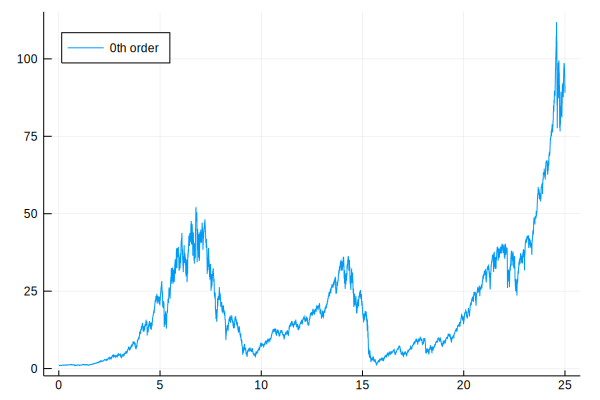

In [113]:
plot((1:length(wr0))/252, cumprod(1 .+ wr0), label="0th order", legend=:topleft)

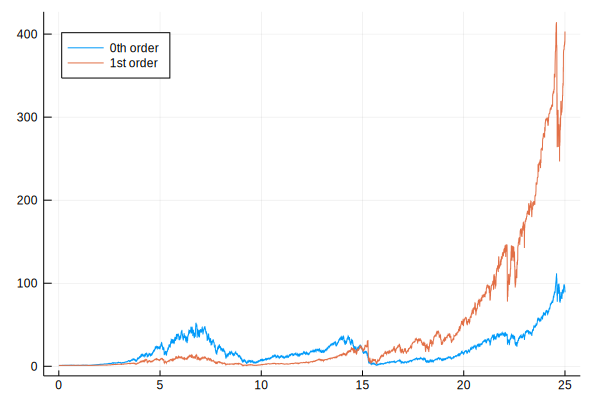

In [114]:
plot!((1:length(wr1))/252,cumprod(1 .+ wr1), label="1st order")

In [117]:
savefig("1st_order")

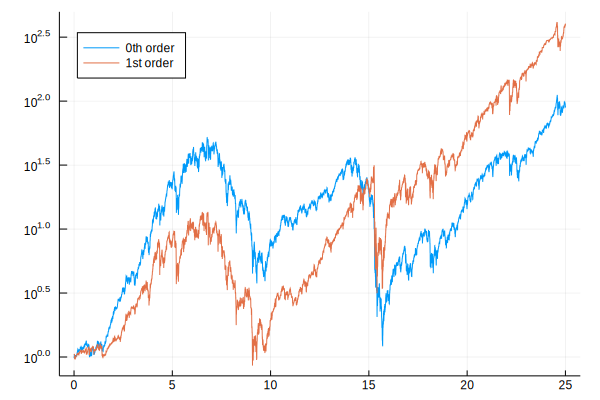

In [115]:
plot!(yscale=:log)

In [118]:
savefig("1st_order_log")

In [50]:
states = [(cubiles[i-2]-1)*3+cubiles[i-1] for i in 3:length(cubiles)]

6300-element Array{Int64,1}:
 3
 8
 6
 7
 2
 4
 1
 1
 2
 6
 8
 5
 5
 ⋮
 4
 2
 5
 5
 4
 2
 4
 2
 4
 2
 4
 3

In [51]:
function f(w::Vector{Float64}, g::Vector{Float64}, r::Vector{Float64})
    g[1] = sum(r ./ (1 .+ w[1] .* r))
    return sum(log.(1 .+ w[1] .* r)) 
end

f (generic function with 2 methods)

In [52]:
function findw(r::Vector{Float64})
    problem = Opt(:LD_MMA,1)
    lower_bounds!(problem,[-10.0])
    upper_bounds!(problem,[10.0])
    xtol_rel!(problem,1e-4)
    max_objective!(problem,(w,g)->f(w,g,r))
    (minf,w,ret)=optimize(problem,[0.5])
    return w
end

findw (generic function with 1 method)

In [53]:
w9 = fill(NaN,9)
for i = 1:9
    w9[i]=findw(recentreturns[3:end][states.==i])[1]
end

In [54]:
w9

9-element Array{Float64,1}:
  7.409664091023799 
 -3.317856778040025 
  3.58405670036354  
  6.129810621999355 
  0.3221538700941963
  6.426458381738242 
  0.8122711730515314
  4.466844891831409 
 -2.741071303037823 

In [119]:
wr2 = [w9[states[i]]*recentreturns[3:end][i] for i in 1:length(states)]

6300-element Array{Float64,1}:
  0.008074879745919054  
  0.042725371390367424  
 -0.018077627427829673  
  0.00030216487637516965
  0.012282705792304173  
 -0.0389610763134279    
 -0.07374838669795987   
  0.02393321501400687   
 -0.04198415966931848   
 -0.0032196556492508593 
  0.00732562562260351   
 -0.0005544268104321119 
  0.0013627108704984505 
  ⋮                     
  0.017114431256622202  
  0.0029495746756775824 
 -0.0006504286637201823 
 -0.001259943785938402  
  0.010255173170604922  
  0.020481129890841075  
  0.011524043969358787  
  0.04519916288723926   
  0.01349171317902058   
  0.028653011135153655  
  0.03822549903878798   
  0.002935342437597739  

In [120]:
StatsBase.mean(wr2)*252

0.8003338488827816

In [121]:
StatsBase.std(wr2)*sqrt(252)

0.8826401968777605

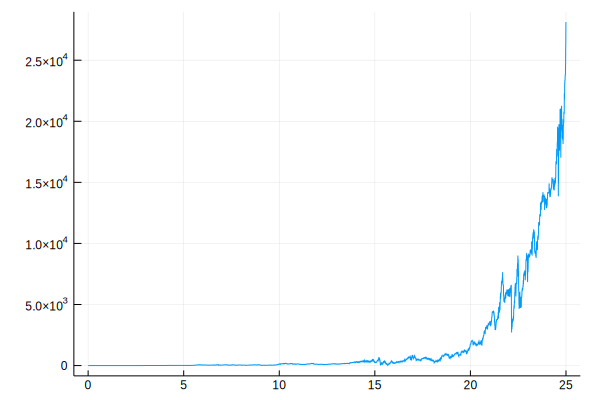

In [122]:
plot((1:length(wr2))/252, cumprod(1 .+ wr2), legend=false)

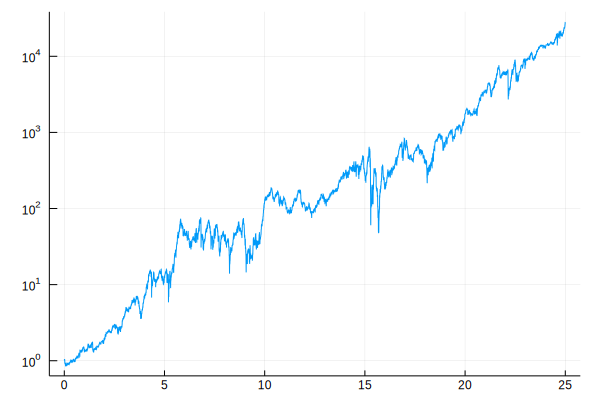

In [123]:
plot!(yscale=:log)

In [124]:
savefig("2nd_order")

In [172]:
wrs = Vector{Float64}[]
lagyears = [1,2,5,10,25]
for lag in 252*lagyears
    push!( wrs, Float64[] )
    for year = 1:25
        trainingdata = returns[end+(year-26)*252-lag+1:end+(year-26)*252]
        (lo,hi) = StatsBase.quantile(trainingdata,[1/3,2/3])
        trainingcubiles = [searchsorted([lo,hi],r).start for r in trainingdata[1:end-1]]
        w = findw(trainingdata)[1] 

        testdata = returns[end+(year-26)*252+1:end+(year-25)*252]
        wrs[end] = vcat(wrs[end], w*testdata)
    end
end

In [173]:
StatsBase.mean.([log.(1 .+ wr) for wr in wrs]) * 252

5-element Array{Float64,1}:
  0.17462742445875537
  0.09421831062515583
 -0.02476687707361897
 -0.12240604403196183
  0.10810863664689324

In [174]:
StatsBase.std.([log.(1 .+ wr) for wr in wrs]) * sqrt(252)

5-element Array{Float64,1}:
 1.1657443940783354
 1.144517394228053 
 1.0994433213102819
 0.8190864555413346
 0.2017999353097032

┌ Warning: scale log is unsupported with Plots.GRBackend().  Choose from: Symbol[:identity, :log10]
└ @ Plots /home/jrun/.julia/packages/Plots/EJpx2/src/args.jl:1168


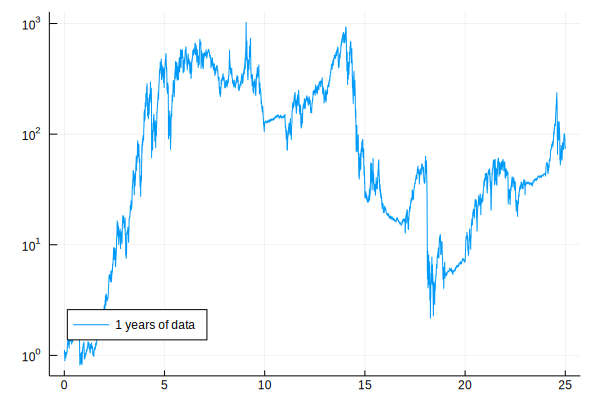

In [175]:
plot((1:length(wrs[1]))/252, cumprod(1 .+ wrs[1]), label = "$(lagyears[1]) years of data", legend=:bottomleft, yscale=:log)

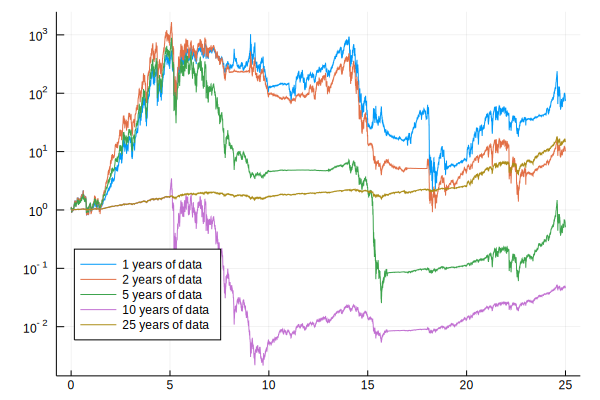

In [176]:
[plot!((1:length(wrs[i]))/252, cumprod(1 .+ wrs[i]), label="$(lagyears[i]) years of data") for i in 2:length(wrs)][end]

In [177]:
savefig("0th_order_outofsample")

In [178]:
wrs = Vector{Float64}[]
lagyears = [1,2,5,10,25]
for lag in 252*lagyears
    push!( wrs, Float64[] )
    for year = 1:25
        trainingdata = returns[end+(year-26)*252-lag+1:end+(year-26)*252]
        (lo,hi) = StatsBase.quantile(trainingdata,[1/3,2/3])
        trainingcubiles = [searchsorted([lo,hi],r).start for r in trainingdata[1:end-1]]
        w = fill(NaN,3)
        for i = 1:3
            w[i] = findw(trainingdata[2:end][trainingcubiles.==i])[1]
        end 

        statedata = returns[end+(year-26)*252:end+(year-25)*252-1]
        statecubiles = [searchsorted([lo,hi],r).start for r in statedata]

        testdata = returns[end+(year-26)*252+1:end+(year-25)*252]
        wrs[end] = vcat(wrs[end], [w[statecubiles[i]]*testdata[i] for i in 1:length(testdata)])
    end
end

In [179]:
StatsBase.mean.([log.(1 .+ wr) for wr in wrs]) * 252

5-element Array{Float64,1}:
  0.027220482658774116
  0.19853565098591913 
  0.07645341411281956 
  0.17111033646566073 
 -0.2979343993513561  

In [180]:
StatsBase.std.([log.(1 .+ wr) for wr in wrs]) * sqrt(252)

5-element Array{Float64,1}:
 1.540102891925915 
 1.4778224091535963
 1.3799690811137812
 0.87114640442043  
 1.0473457253524823

┌ Warning: scale log is unsupported with Plots.GRBackend().  Choose from: Symbol[:identity, :log10]
└ @ Plots /home/jrun/.julia/packages/Plots/EJpx2/src/args.jl:1168


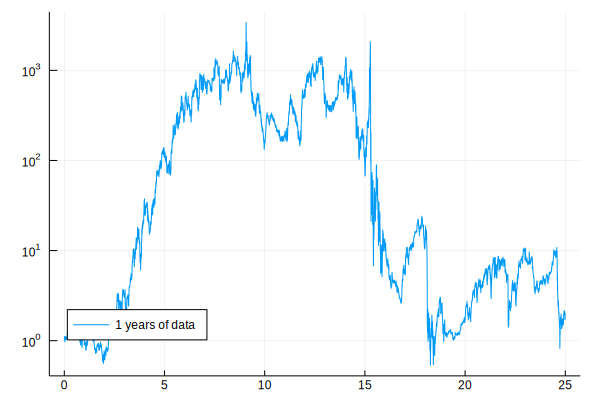

In [181]:
plot((1:length(wrs[1]))/252, cumprod(1 .+ wrs[1]), label = "$(lagyears[1]) years of data", legend=:bottomleft, yscale=:log)

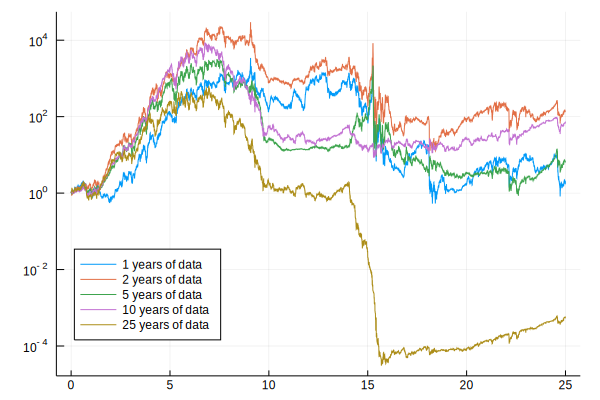

In [182]:
[plot!((1:length(wrs[i]))/252, cumprod(1 .+ wrs[i]), label="$(lagyears[i]) years of data") for i in 2:length(wrs)][end]

In [183]:
savefig("1st_order_outofsample")

In [68]:
lag=10*252
wr = Float64[]
for year = 1:15
    trainingdata = returns[end+(year-26)*252-lag+1:end+(year-26)*252]
    (lo,hi) = StatsBase.quantile(trainingdata,[1/3,2/3])
    trainingcubiles = [searchsorted([lo,hi],r).start for r in trainingdata[1:end-1]]
    w = fill(NaN,3)
    for i = 1:3
        w[i] = findw(trainingdata[2:end][trainingcubiles.==i])[1]
    end 

    statedata = returns[end+(year-26)*252:end+(year-25)*252-1]
    statecubiles = [searchsorted([lo,hi],r).start for r in statedata]

    testdata = returns[end+(year-26)*252+1:end+(year-25)*252]
    wr = vcat(wr, [w[statecubiles[i]]*testdata[i] for i in 1:length(testdata)])
end

In [69]:
length(wr)

3780

In [70]:
StatsBase.mean(log.(1 .+ wr))*252

0.16774253338048836

In [71]:
StatsBase.std(log.(1 .+ wr))*sqrt(252)

0.9659731517176858

┌ Warning: scale log is unsupported with Plots.GRBackend().  Choose from: Symbol[:identity, :log10]
└ @ Plots /home/jrun/.julia/packages/Plots/EJpx2/src/args.jl:1168


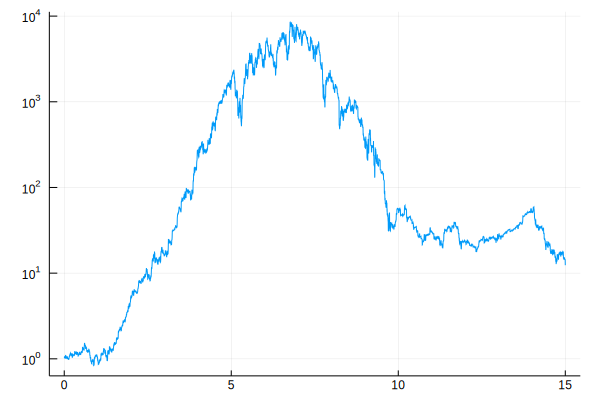

In [75]:
plot((1:length(wr))/252, cumprod(1 .+ wr), legend=false, yscale=:log)

In [ ]:
using LinearAlgebra

In [87]:
function f(w::Vector{Float64}, g::Vector{Float64}, r::Vector{Float64}, p::Vector{Float64})
    g[1] = dot(p, r ./ (1 .+ w[1] .* r))
    return dot(p, log.(1 .+ w[1] .* r)) 
end

f (generic function with 2 methods)

In [86]:
function findw(r::Vector{Float64}, p::Vector{Float64})
    problem = Opt(:LD_MMA,1)
    lower_bounds!(problem,[max(-10.0,-1/maximum(r))])
    upper_bounds!(problem,[min(10.0,-1/minimum(r))])
    xtol_rel!(problem,1e-4)
    max_objective!(problem,(w,g)->f(w,g,r,p))
    (minf,w,ret)=optimize(problem,[0.5])
    return w[1]
end

findw (generic function with 1 method)

In [117]:
wrs = Vector{Float64}[]
lagyears = [1,2,5,10,25]
for lag in 252*lagyears
    push!( wrs, Float64[] )
    for year = 1:25
        trainingdata = returns[end+(year-26)*252-lag+1:end+(year-26)*252]
        (lo,hi) = StatsBase.quantile(trainingdata,[1/3,2/3])
        trainingtertiles = [searchsorted([lo,hi],r).start for r in trainingdata]
        n = [sum((trainingtertiles[1:end-1].==i).&(trainingtertiles[2:end].==j)) for i in 1:3, j in 1:3]
        P = n./sum(n,dims=2)
        
        w = fill(NaN,3)
        for i = 1:3
            p = [P[i,tt] for tt in trainingtertiles[2:end]]
            w[i] = findw(trainingdata[2:end], p)
        end 

        statedata = returns[end+(year-26)*252:end+(year-25)*252-1]
        statecubiles = [searchsorted([lo,hi],r).start for r in statedata]

        testdata = returns[end+(year-26)*252+1:end+(year-25)*252]
        wrs[end] = vcat(wrs[end], [w[statecubiles[i]]*testdata[i] for i in 1:length(testdata)])
    end
end

In [118]:
StatsBase.mean.([log.(1 .+ wr) for wr in wrs]) * 252

5-element Array{Float64,1}:
 0.07338007869008542
 0.2458714785513209 
 0.15205936746152515
 0.08968630950851374
 0.13911672424707233

In [119]:
StatsBase.std.([log.(1 .+ wr) for wr in wrs]) * sqrt(252)

5-element Array{Float64,1}:
 1.282595655394787 
 1.416758802115723 
 1.3584108051002668
 0.9768213720812443
 0.6816369055352727

┌ Warning: scale log is unsupported with Plots.GRBackend().  Choose from: Symbol[:identity, :log10]
└ @ Plots /home/jrun/.julia/packages/Plots/EJpx2/src/args.jl:1168


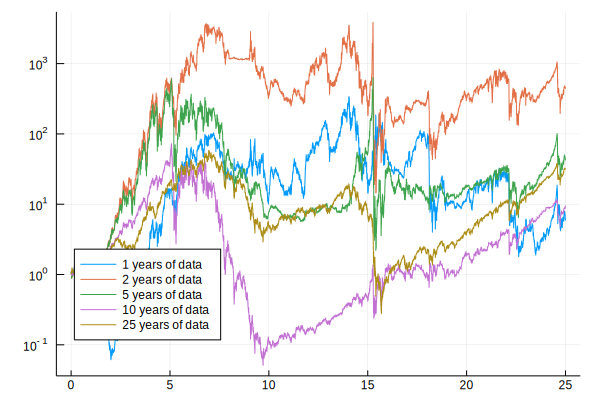

In [125]:
plot((1:length(wrs[1]))/252, cumprod(1 .+ wrs[1]), label = "$(lagyears[1]) years of data", legend=:bottomleft, yscale=:log)
[plot!((1:length(wrs[i]))/252, cumprod(1 .+ wrs[i]), label="$(lagyears[i]) years of data") for i in 2:length(wrs)][end]

In [126]:
prod(1 .+ wrs[end-1][2520:end])

84.8222629280638

In [128]:
StatsBase.mean(log.(1 .+ wrs[end-1][2520:end]))*252

0.2959589068509468

In [129]:
StatsBase.std(log.(1 .+ wrs[end-1][2520:end]))*sqrt(252)

0.7298924865952828

┌ Warning: scale log is unsupported with Plots.GRBackend().  Choose from: Symbol[:identity, :log10]
└ @ Plots /home/jrun/.julia/packages/Plots/EJpx2/src/args.jl:1168


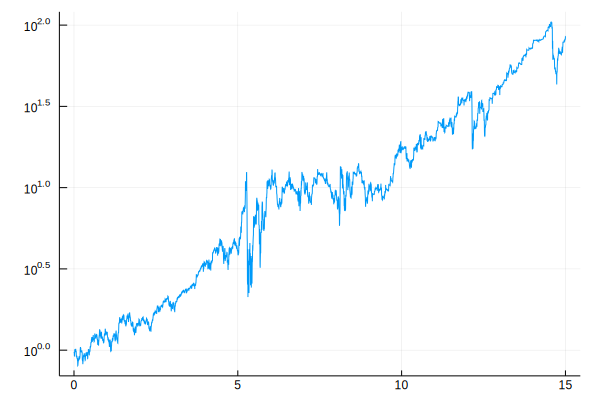

In [134]:
plot((1:length(wrs[end-1][2520:end]))/252, cumprod(1 .+ wrs[end-1][2520:end]), legend=false, yscale=:log)